In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
def CreateTangentProbBase(slope_tang, y_prob, p):
    # create the tangent using y = mx + c

    unit_x_tang = [0, 2]
    unit_y_tang = [0, slope_tang*2]

    # translate the tangent to the base of proboscis to visualize vector
    trans_x_tang = unit_y_tang + p(y_prob)[0]
    trans_y_tang = unit_x_tang + y_prob[0]

    # make it point from the base to the tip of the proboscis (rotate by 180 degrees)
    trans_x_tang_rot = trans_x_tang[::-1]
    trans_y_tang_rot = trans_y_tang[::-1]

    #translate it to start from the second point (proboscis Base) and point further
    trans_x_tang_rot_transMore = [trans_x_tang_rot[1], trans_x_tang_rot[1] + (trans_x_tang_rot[1] - trans_x_tang_rot[0])] 
    trans_y_tang_rot_transMore = [trans_y_tang_rot[1], trans_y_tang_rot[1] + (trans_y_tang_rot[1] - trans_y_tang_rot[0])]

    return(trans_x_tang_rot_transMore, trans_y_tang_rot_transMore)

In [2]:
# pull up the polyfit variables and x, y positions

p_fit = np.load('./dataFolder/3DpolyfitVariables.npy') #load the coefficients of the polyfit
X_arr = pd.read_csv('./dataFolder/x_proboscis_ordered')
X_arr = X_arr.drop(['Unnamed: 0'], axis=1)
Y_arr = pd.read_csv('./dataFolder/y_proboscis_ordered')
Y_arr = Y_arr.drop(['Unnamed: 0'], axis=1)

In [3]:
Y_arr

,prob_base_Y,prob_1_Y,prob_2_Y,prob_3_Y,prob_4_Y,prob_5_Y,prob_mid_Y
0,323.795071,314.190856,307.238159,300.212757,293.442655,287.157793,277.537139
1,327.728714,320.557345,310.449771,302.621466,295.597465,288.594333,278.019424
2,321.217857,315.709023,309.847593,301.216386,295.238330,286.080388,278.000000
3,323.250858,314.914284,309.245416,301.216386,295.597465,287.696495,278.019424
4,316.354012,312.985141,306.635981,300.614209,294.699627,287.157793,278.000000
...,...,...,...,...,...,...,...
995,320.701713,310.449771,301.216386,295.058762,288.235198,282.848173,278.019424
996,316.361142,304.396271,297.603323,290.928710,286.439523,281.770768,276.572567
997,323.595428,310.449771,300.614209,295.058762,288.773900,282.309471,276.572567
998,315.155427,302.621466,297.001146,291.826547,287.157793,282.309471,276.090281


In [138]:
# save images in folder

folder = './dataFolder/errorSignal/polyFitMethod4/'

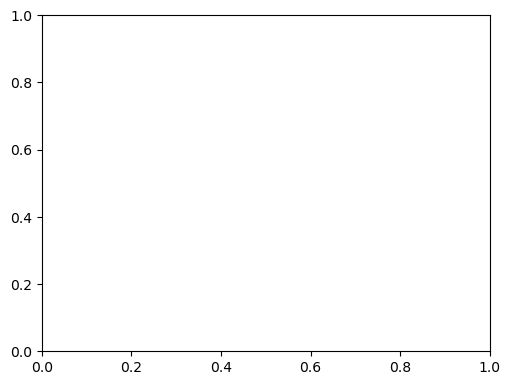

In [22]:
f = plt.figure()
ax = f.add_axes([0.3, 0.3, 0.7, 0.7])
tang_x = []
tang_y = []

for ii, _ in Y_arr.iterrows():
    testy = Y_arr.loc[ii,:].values
    testx = X_arr.loc[ii,:].values
    p = np.poly1d(p_fit[ii])
    
    # get the slope of tangent at the base, slope of tangent == derivative at base
    der_p = p.deriv()
    der_poly1d = np.poly1d(der_p)

    slope_tang = der_poly1d(testy[0]) 
    #note that the for the fit, the axes are reversed and hence the x axis for the fit evalulation is the testy 
    
    #get coordinates for the tangent
    tangent_x, tangent_y = CreateTangentProbBase(slope_tang, testy, p)
    tang_x.append(tangent_x)
    tang_y.append(tangent_y)
    
#     plt.plot(testx, testy, 'o')
#     plt.plot(p(testy), testy, 'or-')
#     plt.plot(tangent_x, tangent_y, 'ok-')
#     figname = str(ii).zfill(4) + '.png'
#     plt.savefig(folder + figname)

#     plt.cla()
tangent = pd.DataFrame({'x': tang_x, 'y':tang_y})
x = pd.DataFrame(tangent['x'].to_list(), columns = ['x1', 'x2'])
y = pd.DataFrame(tangent['y'].to_list(), columns = ['y1', 'y2'])
df = pd.concat([x, y], axis=1)
df.to_csv('./dataFolder/ProboscisVector.csv')